In [2]:
#Install lib
pip install Pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
from PIL import Image

# Substitua 'sua_imagem.tif' pelo caminho real do seu arquivo .TIF
caminho_imagem = '/home/barcelos/Desktop/LL14/LC08_L1TP_215074_20141229_20200910_02_T1_B2.TIF'

# Abrir a imagem
imagem = Image.open(caminho_imagem)

# Exibir a imagem
imagem.show()


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/barcelos/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [21]:
import os

ld_library_path = os.getenv('LD_LIBRARY_PATH')

if ld_library_path:
    print(f'LD_LIBRARY_PATH está configurado: {ld_library_path}')
else:
    print('LD_LIBRARY_PATH não está configurado.')


LD_LIBRARY_PATH não está configurado.


In [24]:
pip install rasterio


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


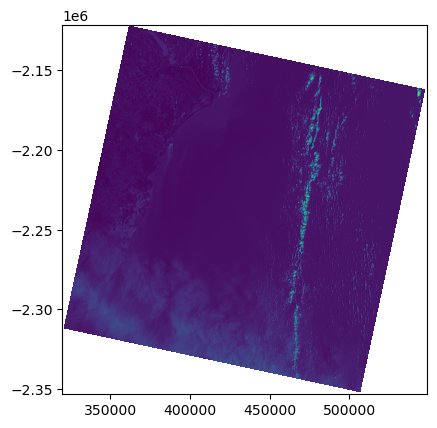

In [25]:
import rasterio
from rasterio.plot import show

# Substitua 'caminho/para/sua/imagem.tif' pelo caminho real do seu arquivo TIFF
caminho_imagem = '/home/barcelos/Desktop/LL14/LC08_L1TP_215074_20141229_20200910_02_T1_B2.TIF'

# Abrir a imagem TIFF com rasterio
with rasterio.open(caminho_imagem) as src:
    # Visualizar a imagem
    show(src)


In [32]:
pip install geopandas rasterio matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


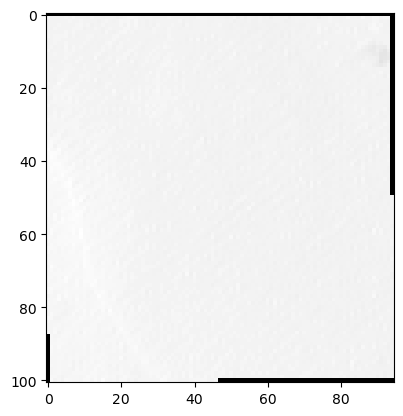

Imagem recortada salva em: /home/barcelos/Desktop/LL14/LL14CUTB2/LL14CUT.tif


In [9]:
import os
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import mapping
from matplotlib import pyplot as plt

# Substitua 'caminho/para/sua/imagem.tif' pelo caminho real do seu arquivo TIFF
caminho_imagem = '/home/barcelos/Desktop/LL14/LC08_L1TP_215074_20141229_20200910_02_T1_B2.TIF'
# Substitua 'caminho/para/seu/shapefile.shp' pelo caminho real do seu arquivo shapefile
caminho_shapefile = '/home/barcelos/Desktop/AOI/AOI2.shp'

# Abrir o shapefile com geopandas
gdf = gpd.read_file(caminho_shapefile)

# Reprojetar a geometria do shapefile para o CRS da imagem raster (EPSG:32624)
gdf = gdf.to_crs(epsg=32624)

# Abrir a imagem TIFF com rasterio
with rasterio.open(caminho_imagem) as src:
    # Recuperar a geometria da máscara do shapefile
    geometria_mascara = gdf.geometry.values[0]

    # Converta a geometria para um formato que o rasterio entenda
    geometria_mascara = [mapping(geometria_mascara)]

    # Recortar a imagem usando a geometria do shapefile como máscara
    imagem_recortada, transformacao_recortada = mask(src, geometria_mascara, crop=True)

    # Atualizar a transformação da imagem recortada
    profile = src.profile
    profile['transform'] = transformacao_recortada

# Exibir a imagem recortada
plt.imshow(imagem_recortada[0], cmap='gray')
plt.show()

# Caminho para o diretório de destino
diretorio_destino = '/home/barcelos/Desktop/LL14/LL14CUTB2/'

# Criar o diretório se não existir
os.makedirs(diretorio_destino, exist_ok=True)

# Salvar a imagem recortada em um novo arquivo TIFF
caminho_destino = os.path.join(diretorio_destino, 'LL14CUT.tif')
with rasterio.open(caminho_destino, 'w', **profile) as dst:
    dst.write(imagem_recortada)

# Exibir mensagem de sucesso
print(f'Imagem recortada salva em: {caminho_destino}')


In [6]:
print("CRS da imagem raster:", src.crs)
print("CRS do shapefile:", gdf.crs)


CRS da imagem raster: EPSG:32624
CRS do shapefile: epsg:32624


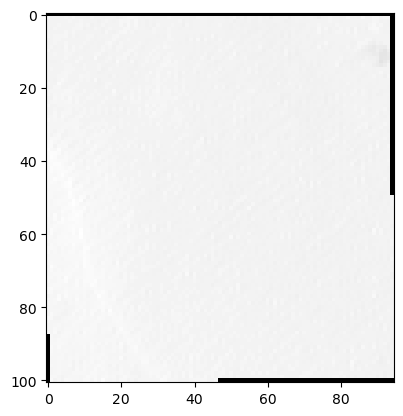

Imagem recortada salva em: /home/barcelos/Desktop/LL14/LL14CUTB2/LL14CUTB2.tif


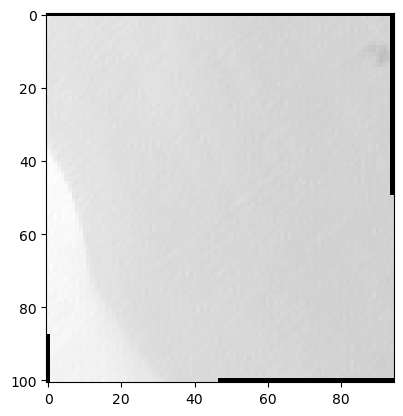

Imagem recortada salva em: /home/barcelos/Desktop/LL14/LL14CUTB3/LL14CUTB3.tif


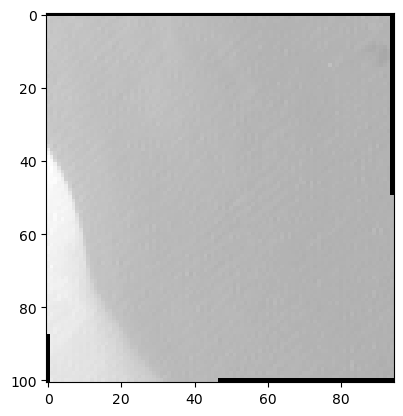

Imagem recortada salva em: /home/barcelos/Desktop/LL14/LL14CUTB4/LL14CUTB4.tif


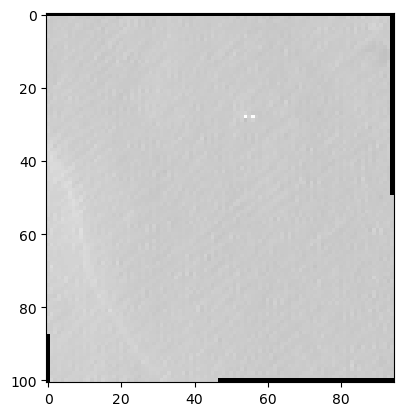

Imagem recortada salva em: /home/barcelos/Desktop/LL14/LL14CUTB5/LL14CUTB5.tif


In [13]:
import os
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import mapping
from matplotlib import pyplot as plt

# Substitua 'caminho/para/sua/imagem.tif' pelo caminho real do seu arquivo TIFF
caminho_imagem_b2 = '/home/barcelos/Desktop/LL14/LC08_L1TP_215074_20141229_20200910_02_T1_B2.TIF'
caminho_imagem_b3 = '/home/barcelos/Desktop/LL14/LC08_L1TP_215074_20141229_20200910_02_T1_B3.TIF'
caminho_imagem_b4 = '/home/barcelos/Desktop/LL14/LC08_L1TP_215074_20141229_20200910_02_T1_B4.TIF'
caminho_imagem_b5 = '/home/barcelos/Desktop/LL14/LC08_L1TP_215074_20141229_20200910_02_T1_B5.TIF'
# Substitua 'caminho/para/seu/shapefile.shp' pelo caminho real do seu arquivo shapefile
caminho_shapefile = '/home/barcelos/Desktop/AOI/AOI2.shp'

# Abrir o shapefile com geopandas
gdf = gpd.read_file(caminho_shapefile)

# Reprojetar a geometria do shapefile para o CRS da imagem raster (EPSG:32624)
gdf = gdf.to_crs(epsg=32624)

# Abrir a imagem TIFF com rasterio
with rasterio.open(caminho_imagem_b2) as src:
    # Recuperar a geometria da máscara do shapefile
    geometria_mascara_b2 = gdf.geometry.values[0]
    # Converta a geometria para um formato que o rasterio entenda
    geometria_mascara_b2 = [mapping(geometria_mascara_b2)]
    # Recortar a imagem usando a geometria do shapefile como máscara
    imagem_recortada_b2, transformacao_recortada_b2 = mask(src, geometria_mascara_b2, crop=True)
    # Atualizar a transformação da imagem recortada
    profile_b2 = src.profile
    profile_b2['transform'] = transformacao_recortada_b2
# Exibir a imagem recortada
plt.imshow(imagem_recortada_b2[0], cmap='gray')
plt.show()
# Caminho para o diretório de destino
diretorio_destino_b2 = '/home/barcelos/Desktop/LL14/LL14CUTB2/'
# Criar o diretório se não existir
os.makedirs(diretorio_destino_b2, exist_ok=True)
# Salvar a imagem recortada em um novo arquivo TIFF
caminho_destino_b2 = os.path.join(diretorio_destino_b2, 'LL14CUTB2.tif')
with rasterio.open(caminho_destino_b2, 'w', **profile_b2) as dst_b2:
    dst_b2.write(imagem_recortada_b2)
# Exibir mensagem de sucesso
print(f'Imagem recortada salva em: {caminho_destino_b2}')

# Abrir a imagem TIFF com rasterio
with rasterio.open(caminho_imagem_b3) as src:
    # Recuperar a geometria da máscara do shapefile
    geometria_mascara_b3 = gdf.geometry.values[0]
    # Converta a geometria para um formato que o rasterio entenda
    geometria_mascara_b3 = [mapping(geometria_mascara_b3)]
    # Recortar a imagem usando a geometria do shapefile como máscara
    imagem_recortada_b3, transformacao_recortada_b3 = mask(src, geometria_mascara_b3, crop=True)
    # Atualizar a transformação da imagem recortada
    profile_b3 = src.profile
    profile_b3['transform'] = transformacao_recortada_b3
# Exibir a imagem recortada
plt.imshow(imagem_recortada_b3[0], cmap='gray')
plt.show()
# Caminho para o diretório de destino
diretorio_destino_b3 = '/home/barcelos/Desktop/LL14/LL14CUTB3/'
# Criar o diretório se não existir
os.makedirs(diretorio_destino_b3, exist_ok=True)
# Salvar a imagem recortada em um novo arquivo TIFF
caminho_destino_b3 = os.path.join(diretorio_destino_b3, 'LL14CUTB3.tif')
with rasterio.open(caminho_destino_b3, 'w', **profile_b3) as dst_b3:
    dst_b3.write(imagem_recortada_b3)
# Exibir mensagem de sucesso
print(f'Imagem recortada salva em: {caminho_destino_b3}')

# Abrir a imagem TIFF com rasterio
with rasterio.open(caminho_imagem_b4) as src:
    # Recuperar a geometria da máscara do shapefile
    geometria_mascara_b4 = gdf.geometry.values[0]
    # Converta a geometria para um formato que o rasterio entenda
    geometria_mascara_b4 = [mapping(geometria_mascara_b4)]
    # Recortar a imagem usando a geometria do shapefile como máscara
    imagem_recortada_b4, transformacao_recortada_b4 = mask(src, geometria_mascara_b4, crop=True)
    # Atualizar a transformação da imagem recortada
    profile_b4 = src.profile
    profile_b4['transform'] = transformacao_recortada_b4
# Exibir a imagem recortada
plt.imshow(imagem_recortada_b4[0], cmap='gray')
plt.show()
# Caminho para o diretório de destino
diretorio_destino_b4 = '/home/barcelos/Desktop/LL14/LL14CUTB4/'
# Criar o diretório se não existir
os.makedirs(diretorio_destino_b4, exist_ok=True)
# Salvar a imagem recortada em um novo arquivo TIFF
caminho_destino_b4 = os.path.join(diretorio_destino_b4, 'LL14CUTB4.tif')
with rasterio.open(caminho_destino_b4, 'w', **profile_b4) as dst_b4:
    dst_b4.write(imagem_recortada_b4)
# Exibir mensagem de sucesso
print(f'Imagem recortada salva em: {caminho_destino_b4}')

# Abrir a imagem TIFF com rasterio
with rasterio.open(caminho_imagem_b5) as src:
    # Recuperar a geometria da máscara do shapefile
    geometria_mascara_b5 = gdf.geometry.values[0]
    # Converta a geometria para um formato que o rasterio entenda
    geometria_mascara_b5 = [mapping(geometria_mascara_b5)]
    # Recortar a imagem usando a geometria do shapefile como máscara
    imagem_recortada_b5, transformacao_recortada_b5 = mask(src, geometria_mascara_b5, crop=True)
    # Atualizar a transformação da imagem recortada
    profile_b5 = src.profile
    profile_b5['transform'] = transformacao_recortada_b5
# Exibir a imagem recortada
plt.imshow(imagem_recortada_b5[0], cmap='gray')
plt.show()
# Caminho para o diretório de destino
diretorio_destino_b5 = '/home/barcelos/Desktop/LL14/LL14CUTB5/'
# Criar o diretório se não existir
os.makedirs(diretorio_destino_b5, exist_ok=True)
# Salvar a imagem recortada em um novo arquivo TIFF
caminho_destino_b5 = os.path.join(diretorio_destino_b5, 'LL14CUTB5.tif')
with rasterio.open(caminho_destino_b5, 'w', **profile_b5) as dst_b5:
    dst_b5.write(imagem_recortada_b5)
# Exibir mensagem de sucesso
print(f'Imagem recortada salva em: {caminho_destino_b5}')


/tmp/ipykernel_424043/955664995.py:17: RuntimeWarning: invalid value encountered in divide
  ndwi = (b3 - b5) / (b3 + b5)


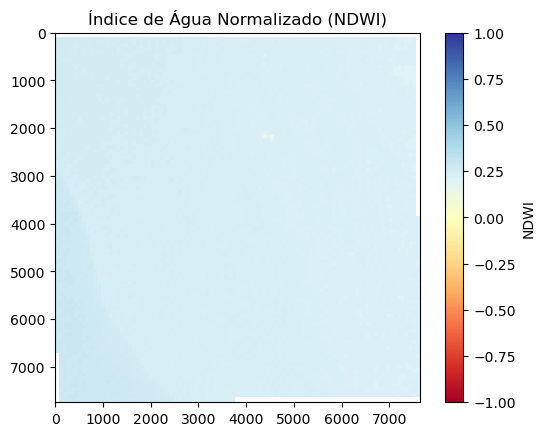

NDWI salvo em: /home/barcelos/Desktop/LL14/LL14-NDWI.tif


In [1]:
import os
import rasterio
import numpy as np
from matplotlib import pyplot as plt

# Caminhos para as imagens B3 e B5
caminho_b3 = '/home/barcelos/Desktop/LL14/LL14CUTB3/LL14CUTB3.tif'
caminho_b5 = '/home/barcelos/Desktop/LL14/LL14CUTB5/LL14CUTB5.tif'

# Abrir as imagens TIFF com rasterio
with rasterio.open(caminho_b3) as src_b3, rasterio.open(caminho_b5) as src_b5:
    # Ler os dados das bandas como matrizes numpy
    b3 = src_b3.read(1)
    b5 = src_b5.read(1)

    # Calcular NDWI
    ndwi = (b3 - b5) / (b3 + b5)

    # Obter informações do perfil da imagem (metadata)
    profile = src_b3.profile

# Exibir o NDWI
plt.imshow(ndwi, cmap='RdYlBu', vmin=-1, vmax=1)
plt.colorbar(label='NDWI')
plt.title('Índice de Água Normalizado (NDWI)')
plt.show()

# Salvar o NDWI em um novo arquivo TIFF
diretorio_destino = '/home/barcelos/Desktop/LL14/'
nome_arquivo_ndwi = 'LL14-NDWI.tif'
caminho_destino_ndwi = os.path.join(diretorio_destino, nome_arquivo_ndwi)

# Atualizar o perfil com os dados do NDWI
profile.update(count=1, dtype='float32')

# Salvar o NDWI como um novo arquivo TIFF
with rasterio.open(caminho_destino_ndwi, 'w', **profile) as dst:
    dst.write(ndwi, 1)

print(f'NDWI salvo em: {caminho_destino_ndwi}')


In [10]:
import os
import rasterio
import numpy as np
from matplotlib import pyplot as plt

# Caminhos para as imagens B3 e B5
caminho_b3 = '/home/barcelos/Desktop/LL14/LL14CUTB3/LL14CUTB3.tif'
caminho_b5 = '/home/barcelos/Desktop/LL14/LL14CUTB5/LL14CUTB5.tif'

# Abrir as imagens TIFF com rasterio
with rasterio.open(caminho_b3) as src_b3, rasterio.open(caminho_b5) as src_b5:
    # Ler os dados das bandas como matrizes numpy
    b3 = src_b3.read(1)
    b5 = src_b5.read(1)

    # Imprimir algumas informações sobre as imagens
    print("Informações sobre a Banda B3:")
    print(b5)
    print(f"Shape: {b3.shape}")
    print(f"Valores únicos: {np.unique(b3)}")

    print("\nInformações sobre a Banda B5:")
    print(f"Shape: {b5.shape}")
    print(f"Valores únicos: {np.unique(b5)}")
    print("\n\n\n\nb55555:")
    print(f"{np.unique(b5)}")
    print(b5)

    # Verificar se há algum valor não-nulo nas bandas antes de calcular o NDWI
    if np.any(~np.isnan(b3)) and np.any(~np.isnan(b5)):
        # Calcular NDWI, evitando a divisão por zero
        with np.errstate(divide='ignore', invalid='ignore'):
            ndwi = (b3 - b5) / (b3 + b5)
    else:
        print("Valores nulos em ambas as bandas. Impossível calcular o NDWI.")
        ndwi = np.full_like(b3, np.nan, dtype='float32')

    # Obter informações do perfil da imagem (metadata)
    profile = src_b3.profile

# Exibir o NDWI
plt.imshow(ndwi, cmap='RdYlBu', vmin=-1, vmax=1)
plt.colorbar(label='NDWI')
plt.title('Índice de Água Normalizado (NDWI)')
plt.show()

# Imprimir a matriz de NDWI
print("\nMatriz NDWI:")
print(ndwi)

# Salvar o NDWI em um novo arquivo TIFF
diretorio_destino = '/home/barcelos/Desktop/LL14/'
nome_arquivo_ndwi = 'LL14-NDWI.tif'
caminho_destino_ndwi = os.path.join(diretorio_destino, nome_arquivo_ndwi)

# Atualizar o perfil com os dados do NDWI
profile.update(count=1, dtype='float32')

# Salvar o NDWI como um novo arquivo TIFF
with rasterio.open(caminho_destino_ndwi, 'w', **profile) as dst:
    dst.write(ndwi, 1)

print(f'NDWI salvo em: {caminho_destino_ndwi}')


Informações sobre a Banda B3:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
import os
import rasterio
import numpy as np
from matplotlib import pyplot as plt

# Caminhos para as imagens B3 e B5
caminho_b3 = '/home/barcelos/Desktop/LL14/LL14CUTB3/LL14CUTB3.tif'
caminho_b5 = '/home/barcelos/Desktop/LL14/LL14CUTB5/LL14CUTB5.tif'

with rasterio.open(caminho_b5) as src_b5:
    print(src_b5.profile)  # Isso imprimirá informações sobre o arquivo raster B5
    b5 = src_b5.read(1)
    print(b5)


{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7641, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32624), 'transform': Affine(30.0, 0.0, 416685.0,
       0.0, -30.0, -2172015.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [2]:
import numpy as np

b4_values = np.array([7709, 7634])
b5_values = np.array([7343, 7301])

# Calcular NDCI
ndci_values = (b5_values - b4_values) / (b5_values + b4_values)

# Exibir os resultados
print(f'NDCI calculado: {ndci_values}')

NDCI calculado: [-0.02431571 -0.02229662]
